DataHour x Adyen.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1dpN4lRBz3soR8zVdFE6xJM5WwdU647sD

# Powering On-Prem GenAI - From Infrastructure to Impact

https://community.analyticsvidhya.com/c/datahour/powering-on-prem-genai-from-infrastructure-to-impact

Adyen x Analytics Vidhya (DataHour)

📅 Date: 6 March 2025
🕖 Time: 7:00 PM - 8:00 PM IST
Speakers:
- Sergio Valmorisco Sierra (Adyen)
- Pablo Gómez-Caldito (Adyen)

# Select a GPU runtime!
Go to Runtime -> Change runtime type

Select Python3 and T4 GPU

## Introduction

Hey everyone! 🚀 Welcome to today’s webinar, where we’re diving into the world of Retrieval-Augmented Generation (RAG) and how it can revolutionize customer support bots.

Imagine a world where chatbots actually know what they’re talking about—pulling accurate, up-to-date information in real-time instead of making wild guesses. That’s exactly what we’re building today!

To make things fun, we’ll be working with a (fictional, but delicious) company, ChocolateIsTasty—because who doesn’t love chocolate? 🍫 We’ll see how RAG can transform their customer support by answering queries with real company knowledge.

So grab some chocolate and let’s get started! 🚀

## Installing requirements


In [2]:

!pip install langchain==0.3.19
!pip install faiss-gpu-cu12==1.10.0
!pip install langchain-huggingface==0.1.2
!pip install langchain-community==0.3.18

# for windows optp for faiss-cpu
# uv pip install langchain==0.3.19 faiss-cpu langchain-huggingface==0.1.2 langchain-community==0.3.18


  Could not find a version that satisfies the requirement langchain==0.3.19 (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.0.9, 0.0.10, 0.0.11, 0.0.12, 0.0.13, 0.0.14, 0.0.15, 0.0.16, 0.0.17, 0.0.18, 0.0.19, 0.0.20, 0.0.21, 0.0.22, 0.0.23, 0.0.24, 0.0.25, 0.0.26, 0.0.27)
No matching distribution found for langchain==0.3.19
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement faiss-gpu-cu12==1.10.0 (from versions: )
No matching distribution found for faiss-gpu-cu12==1.10.0
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement langchain-huggingface==0.1.2 (from versions: )
No matching distribution found for langchain-huggingface==0.1.2
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement langchain-community==0.3.18 (from versions: )
No matching distribution found for langchain-community==0.3.18
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## What is Retrieval-Augmented Generation (RAG)?

How RAG Works – Step by Step
This diagram shows how Retrieval-Augmented Generation (RAG) works in two main phases:

1️⃣ Pre-production (Setting Up the Knowledge Base)

Before the system goes live, we need to prepare our knowledge base:

- We start with a collection of documents (like FAQs, manuals, or support articles).
- These documents are split into smaller chunks (so the system can retrieve relevant parts later).
- Each chunk is converted into embeddings (numerical representations of text) using an embedding model.
- The embeddings are stored in a vector database, which allows for quick similarity searches.

2️⃣ In Production (Answering User Queries)

When a user asks a question, the system follows these steps:

🔎 Step 1: Retriever
- The user’s query is converted into an embedding (just like the documents).
- The system searches the vector database for the most relevant documents (the ones with the closest embeddings).
- These top matching documents are retrieved.

📖 Step 2: Reader (Generating an Answer)
- The system combines the retrieved documents into a context. Some improvements might happen here, like reranking, compressing or filtering the content.
- The LLM (Large Language Model) then generates a response based on both the user query and the retrieved context.
- Finally, the system provides the LLM-generated answer to the user.

**Why is This Better Than a Regular Chatbot?**

✅ More accurate – It retrieves real information instead of making things up.

✅ Keeps knowledge up-to-date – You don’t have to train the LLM on every update, just update the knowledge base.

✅ Context-aware – The bot’s answers are based on real documents, making responses more relevant.


Image source: https://huggingface.co/learn/cookbook/advanced_rag

![](https://drive.google.com/uc?export=view&id=19_lpLGtmQ-OO1T3KahAlO2TctsXqxJ_a&)

## Creating our models in LangChain

This code instantiates a Hugging Face model of 1.5B parameters. It's quite small, for for demonstrative purposes it's ok!

In [4]:

from langchain_huggingface import  HuggingFacePipeline, ChatHuggingFace

llm = ChatHuggingFace(llm=HuggingFacePipeline.from_model_id(
    model_id="Qwen/Qwen2.5-1.5B-Instruct",
    task="text-generation",
    pipeline_kwargs=dict(
        do_sample=True,
        return_full_text=False,
        max_new_tokens=512,
        temperature=0.1
    ),
))

llm.invoke("Hello!").content

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

C:\Users\fadzw\Downloads\Trash\test-torch\venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\fadzw\.cache\huggingface\hub\models--Qwen--Qwen2.5-1.5B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

Device set to use cpu


'Hello there! How can I assist you today?'

Document embeddings are numerical vector representations of text. They allow AI models to understand and compare the meaning of sentences or documents by mapping them into a high-dimensional space.

Instead of comparing words directly, embeddings capture semantic similarity—sentences with similar meanings will have vectors that are close together, while unrelated sentences will be farther apart.

![](https://drive.google.com/uc?export=view&id=1rtZCTSBK2OutlrrWuGp1TARXGAWDQV4q&)

This is a sentence-transformers model: It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

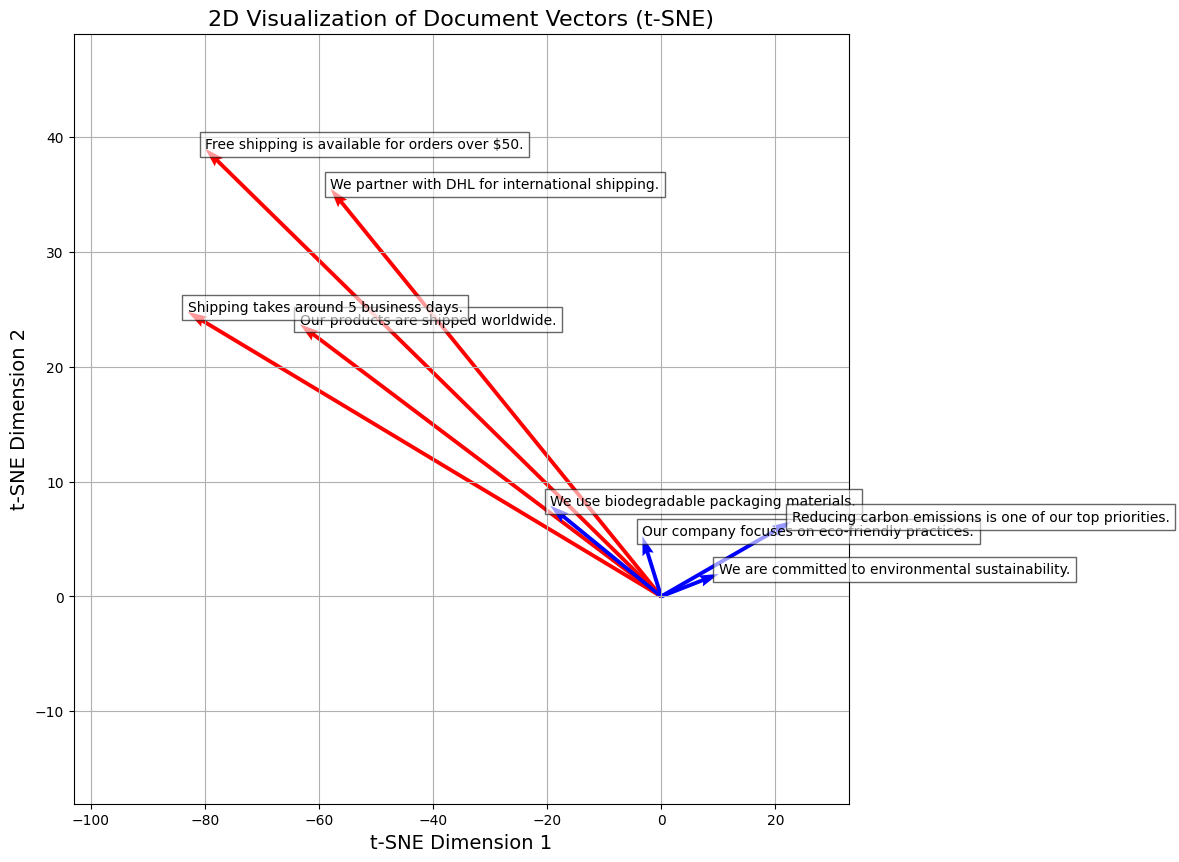

In [6]:

from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Example sentences with two clusters
sentences = [
    # Shipping cluster
    "Our products are shipped worldwide.",
    "Shipping takes around 5 business days.",
    "We partner with DHL for international shipping.",
    "Free shipping is available for orders over $50.",

    # Sustainability cluster
    "We are committed to environmental sustainability.",
    "Our company focuses on eco-friendly practices.",
    "We use biodegradable packaging materials.",
    "Reducing carbon emissions is one of our top priorities."
]

# Get embeddings
embedded_sentences = np.array(embeddings.embed_documents(sentences))

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
reduced_embeddings = tsne.fit_transform(embedded_sentences)

# Define colors by group: first 4 shipping (red), next 4 sustainability (blue)
colors = ['red']*4 + ['blue']*4

plt.figure(figsize=(10, 10))
# Plot each document as a vector from (0,0) to its reduced embedding
for i, (sentence, color) in enumerate(zip(sentences, colors)):
    x, y = reduced_embeddings[i]
    plt.quiver(0, 0, x, y, color=color, angles='xy', scale_units='xy', scale=1, width=0.005)
    plt.text(x + 0.02, y + 0.02, sentence, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.title("2D Visualization of Document Vectors (t-SNE)", fontsize=16)
plt.xlabel("t-SNE Dimension 1", fontsize=14)
plt.ylabel("t-SNE Dimension 2", fontsize=14)
plt.xlim(reduced_embeddings[:,0].min() - 20, reduced_embeddings[:,0].max() + 10)
plt.ylim(reduced_embeddings[:,1].min() - 20, reduced_embeddings[:,1].max() + 10)
plt.grid(True)

plt.show()

## Step 1: Creating the knowledge base

🍫 We’re crafting a delicious dataset of documents covering everything a chocolate lover might ask about—company details, ingredients, manufacturing, shipping, returns, and even chocolate's superpowers (health benefits!).

Each piece of info is wrapped inside a Document object with metadata like the title. This makes it easy for our bot to find and fetch the right answer when a customer asks:

🛒 "Do you have vegan options?"

🚚 "How long does shipping take?"

💔 "Can I return my chocolate if I accidentally eat half of it?" (Spoiler: No.)

In [7]:

from langchain.docstore.document import Document

documents = [
    Document(
        page_content="""
## About ChocolateIsTasty
ChocolateIsTasty is a premium chocolate brand known for its artisanal craftsmanship and ethical sourcing.
We are committed to delivering an unparalleled experience through our chocolates, which are made using the finest ingredients.

### Our Commitment:
- **Sustainability:** We support fair trade and sustainable cocoa farming to protect both farmers and the environment.
- **Craftsmanship:** Each chocolate bar is handcrafted by expert chocolatiers with years of experience.
- **Health-Conscious:** Our chocolates contain no artificial preservatives, colors, or additives.

### Product Range:
1. **Classic Bars:** Dark, milk, and white chocolates in various cocoa percentages.
2. **Gourmet Collection:** Infused with exotic flavors such as lavender, matcha, and chili.
3. **Limited Editions:** Seasonal releases and collaborations with world-renowned pastry chefs.
4. **Vegan and Sugar-Free Options:** Catering to health-conscious and dietary-restricted consumers.
5. **Corporate Gifting and Customization:** Personalized packaging for businesses and special occasions.
        """,
        metadata={"title": "About ChocolateIsTasty"}
    ),
    Document(
        page_content="""
## Ingredients and Sourcing
At ChocolateIsTasty, we take pride in using the highest-quality ingredients that are both natural and ethically sourced.

### Key Ingredients:
- **Cocoa Beans:** We procure premium cocoa from farms in Ghana, Ecuador, and Madagascar. Each region contributes unique flavor profiles, from fruity to nutty.
- **Dairy Products:** Our milk chocolates are made using hormone-free, grass-fed cow’s milk, ensuring rich and creamy textures.
- **Sweeteners:** We use organic cane sugar, honey, and natural fruit extracts as sweeteners.
- **Additional Ingredients:** Hazelnuts from Italy, almonds from California, and vanilla from Madagascar enhance our chocolates.

### Sustainability Practices:
- **Direct Trade Partnerships:** We work directly with farmers to ensure fair wages and sustainable farming.
- **Biodiversity-Friendly Farms:** We source from farms that promote biodiversity, ensuring a healthy ecosystem.
        """,
        metadata={"title": "Ingredients and Sourcing"}
    ),
    Document(
        page_content="""
## Manufacturing Process
ChocolateIsTasty follows a meticulous process to ensure every bar meets the highest standards.

### Step-by-Step Process:
1. **Bean Selection and Roasting:** Cocoa beans are carefully selected and roasted to enhance their natural flavors.
2. **Grinding and Conching:** The beans are ground into a fine paste and conched for up to 72 hours to achieve smoothness.
3. **Tempering:** The chocolate is tempered to create the perfect glossy texture and snap.
4. **Molding and Cooling:** Chocolates are poured into molds and cooled in controlled conditions.
5. **Packaging:** Each bar is hand-wrapped in eco-friendly, biodegradable packaging.

### Quality Control:
- Each batch is tested for flavor, texture, and aroma.
- We adhere to international food safety standards, including ISO 22000 and HACCP.
        """,
        metadata={"title": "Manufacturing Process"}
    ),
    Document(
        page_content="""
## Shipping and Delivery
ChocolateIsTasty ships worldwide, ensuring that chocolates arrive in perfect condition.

### Shipping Methods:
- **Standard Shipping:** 5-7 business days (temperature-controlled packaging included).
- **Express Shipping:** 2-3 business days (priority handling for perishable goods).
- **International Shipping:** 7-14 days, subject to customs regulations.

### Packaging and Handling:
- **Heat-Resistant Packaging:** Our chocolates are packed with insulation to prevent melting.
- **Eco-Friendly Materials:** We use recycled paper and biodegradable materials for packaging.

### Tracking and Support:
Customers receive real-time tracking updates and can reach out to our 24/7 support team for any delivery concerns.
        """,
        metadata={"title": "Shipping and Delivery"}
    ),
    Document(
        page_content="""
## Returns and Refunds
ChocolateIsTasty is committed to customer satisfaction. If you are not happy with your order, we have a flexible return policy.

### Return Policy:
- **Unopened Products:** Returns are accepted within 60 days, and customers receive a full refund.
- **Opened Products:** Due to food safety regulations, we do not accept returns on opened chocolates.
- **Damaged or Incorrect Orders:** If your order arrives damaged or incorrect, contact our support team within 7 days for a replacement or refund.

### Refund Process:
- Refunds are processed within 3-5 business days after approval.
- Customers can choose between store credit or a refund to the original payment method.
        """,
        metadata={"title": "Returns and Refunds"}
    ),
    Document(
        page_content="""
## Health Benefits of Chocolate
Chocolate, especially dark chocolate, provides numerous health benefits when consumed in moderation.

### Key Health Benefits:
- **Antioxidant-Rich:** Dark chocolate contains flavonoids that combat oxidative stress and inflammation.
- **Heart Health:** Studies indicate that moderate chocolate consumption may lower blood pressure and improve circulation.
- **Mood Enhancement:** Chocolate contains serotonin and theobromine, which have mood-boosting effects.
- **Cognitive Benefits:** Some research suggests that flavonoids in chocolate may enhance brain function and memory.
        """,
        metadata={"title": "Health Benefits of Chocolate"}
    )
]


## Step 2: Chunking – Turning Big Chocolate Bars into Bite-Sized Pieces 🍫

Imagine you're eating a giant chocolate bar. You wouldn’t shove the whole thing in your mouth at once (unless you're on a dare). Instead, you break it into pieces so you can savor each bite.

That’s exactly what we’re doing with our documents!

Why Chunking?

- LLMs have a memory limit!
- More precise retrieval! Smaller chunks mean the bot can focus on just the most relevant sections.

In [8]:

from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    separators=["\n\n", "\n"]  # Order of delimiters used for splitting
)
# Split the documents into chunks
chunked_documents = text_splitter.split_documents(documents)


We print a few sample chunks just to see what they look like (because curiosity 🍪).

In [9]:

for i, chunk in enumerate(chunked_documents[:3], start=1):
    print(f"Chunk {i} (from {chunk.metadata.get('title', 'Unknown')}):\n{chunk.page_content}\n---\n")


Chunk 1 (from About ChocolateIsTasty):
## About ChocolateIsTasty
ChocolateIsTasty is a premium chocolate brand known for its artisanal craftsmanship and ethical sourcing.
We are committed to delivering an unparalleled experience through our chocolates, which are made using the finest ingredients.
---

Chunk 2 (from About ChocolateIsTasty):
### Our Commitment:
- **Sustainability:** We support fair trade and sustainable cocoa farming to protect both farmers and the environment.
- **Craftsmanship:** Each chocolate bar is handcrafted by expert chocolatiers with years of experience.
- **Health-Conscious:** Our chocolates contain no artificial preservatives, colors, or additives.
---

Chunk 3 (from About ChocolateIsTasty):
### Product Range:
1. **Classic Bars:** Dark, milk, and white chocolates in various cocoa percentages.
2. **Gourmet Collection:** Infused with exotic flavors such as lavender, matcha, and chili.
3. **Limited Editions:** Seasonal releases and collaborations with world-renow

## Step 3: Storing Our Chocolate Knowledge in FAISS – The AI Memory Bank 🍫💾

Alright, now that we’ve chopped up our chocolate knowledge into perfect bite-sized pieces (chunks), we need a smart way to store and retrieve them efficiently. Enter FAISS—the Ferrero Rocher of vector databases! 🚀

What is FAISS?

FAISS (Facebook AI Similarity Search) is a highly efficient vector search library.
Think of it like a super-fast filing system for our chatbot—when a customer asks a question, FAISS helps us find the most relevant chunks in milliseconds!

How Does This Work?

1️⃣ We take all our document chunks.

2️⃣ We convert them into vector embeddings (dense numerical representations of text).

3️⃣ We store these embeddings in FAISS, so when a customer asks a question, we can quickly retrieve the most relevant chunks.

In [10]:

from langchain.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunked_documents, embeddings)

Let's try to look for documents that contain information about chocolate ingredients!

In [11]:

# Retrieve a few stored embeddings
retrieved_docs = vectorstore.similarity_search("chocolate ingredients", k=3)

# Print retrieved chunks
for i, doc in enumerate(retrieved_docs, start=1):
    print(f"Chunk {i} (from {doc.metadata.get('title', 'Unknown')}):\n{doc.page_content}\n---\n")

Chunk 1 (from Ingredients and Sourcing):
- **Additional Ingredients:** Hazelnuts from Italy, almonds from California, and vanilla from Madagascar enhance our chocolates.
---

Chunk 2 (from Ingredients and Sourcing):
### Key Ingredients:
- **Cocoa Beans:** We procure premium cocoa from farms in Ghana, Ecuador, and Madagascar. Each region contributes unique flavor profiles, from fruity to nutty.
- **Dairy Products:** Our milk chocolates are made using hormone-free, grass-fed cow’s milk, ensuring rich and creamy textures.
- **Sweeteners:** We use organic cane sugar, honey, and natural fruit extracts as sweeteners.
---

Chunk 3 (from Ingredients and Sourcing):
## Ingredients and Sourcing
At ChocolateIsTasty, we take pride in using the highest-quality ingredients that are both natural and ethically sourced.
---



## Step 4: The Perfect Chocolate-Flavored AI Prompt 🍫🎤
Alright, our chatbot has a sweet knowledge base and a super-fast FAISS-powered memory, but now we need to teach it how to respond like a pro! That’s where our Prompt Template comes in.

What is a Prompt Template?
Think of it like a script that the chatbot follows when generating answers. Instead of letting the AI ramble, we structure the prompt so that:

✅ It stays on topic 🧠

✅ It uses the correct context 📚

In [12]:

from langchain.prompts import PromptTemplate


prompt_template = PromptTemplate(
    input_variables=["question", "context"],
    template="""
You are an expert support agent for ChocolateIsTasty, a premium chocolate company.

A customer has asked the following question:
"{question}"

Your task is to answer the question using the following internal knowledge if necessary:
{context}

Your response (be quite concise):
"""
)

## Step 5: Making the AI See (and Show) What It Knows! 👀✨
Alright, now that our AI has a massive chocolate brain (FAISS) and a structured script (prompt template), we need to make sure it’s transparent about how it thinks.

This is where our ProcessDocumentsRunnable comes in—it’s like a chocolate factory tour, but for AI. 🍫🏭

🔧 What’s Happening Here?

We’re creating a custom Runnable (ProcessDocumentsRunnable) that:

Displays the retrieved documents 🖥️

Formats the context before sending it to the AI 🧠

In [13]:

from langchain_core.runnables import Runnable, RunnablePassthrough
from IPython.display import display, Markdown

class ProcessDocumentsRunnable(Runnable):
    def invoke(self, docs, config=None, **kwargs):
        md_output = "#Context: \n\n"
        for doc in docs:
            title = doc.metadata.get("title", "Unknown")
            content = doc.page_content.strip()
            md_output += f"### {title}\n\n{content}\n\n---\n\n"
        display(Markdown(md_output))

        context = "\n\n".join(
            f"Title: {doc.metadata.get('title', 'Unknown')}\nContent: {doc.page_content}"
            for doc in docs
        )
        return context


## Step 6: The AI Chocolate Factory – Bringing Everything Together 🍫🏭

Alright, we’ve done a LOT so far:

✅ We chunked our chocolate knowledge into tasty bite-sized pieces. 🍫

✅ We stored those pieces in FAISS, making retrieval lightning-fast. ⚡

✅ We built a structured prompt so the AI doesn’t sound like a clueless robot. 🤖

✅ We made it transparent, showing exactly what info the AI is using. 👀


Now, it’s time to assemble the final product—the actual chatbot response! 🎤🚀

💡 What’s Happening Here?
This qa_chain is our chocolate assembly line—it retrieves knowledge, formats it, and lets the AI generate a response in a structured way. 🍫🏭

In [14]:

from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


qa_chain = (
    {
        "context": vectorstore.as_retriever(search_kwargs={"k": 2}) # Find the closests chunk
                   | ProcessDocumentsRunnable(), # Show and format the chunk
        "question": RunnablePassthrough(), # Pass the user’s question as-is
    }
    | prompt_template # Inject everything into the prompt
    | llm # AI generates the response
    | StrOutputParser() # Clean up the Response for the user
)

## Unwrapping the Final Chocolate – AI in Action! 🍫🚀
Alright, we’ve built the ultimate chocolate-powered AI.

Now… it’s time to test it! 🎤💡 !!!!!!!!!

In [15]:

response = "# Response:\n\n" + qa_chain.invoke(input = "How many days does the shipping take?")
display(Markdown(response))

response = "# Response:\n\n" + qa_chain.invoke(input = "How many days do I have to return a product?")
display(Markdown(response))

response = "# Response:\n\n" + qa_chain.invoke(input = "Tell me about your safety procedures?")
display(Markdown(response))

response = "# Response:\n\n" + qa_chain.invoke(input = "How do you ensure chocolates don’t melt?")
display(Markdown(response))


#Context: 

### Shipping and Delivery

## Shipping and Delivery
ChocolateIsTasty ships worldwide, ensuring that chocolates arrive in perfect condition.

### Shipping Methods:
- **Standard Shipping:** 5-7 business days (temperature-controlled packaging included).
- **Express Shipping:** 2-3 business days (priority handling for perishable goods).
- **International Shipping:** 7-14 days, subject to customs regulations.

---

### Returns and Refunds

### Return Policy:
- **Unopened Products:** Returns are accepted within 60 days, and customers receive a full refund.
- **Opened Products:** Due to food safety regulations, we do not accept returns on opened chocolates.
- **Damaged or Incorrect Orders:** If your order arrives damaged or incorrect, contact our support team within 7 days for a replacement or refund.

---



# Response:

The shipping time for standard shipping varies between 5-7 business days with temperature-controlled packaging included. Express shipping takes 2-3 business days with priority handling for perishable items. International shipping typically takes 7-14 days, depending on customs regulations.

#Context: 

### Returns and Refunds

### Return Policy:
- **Unopened Products:** Returns are accepted within 60 days, and customers receive a full refund.
- **Opened Products:** Due to food safety regulations, we do not accept returns on opened chocolates.
- **Damaged or Incorrect Orders:** If your order arrives damaged or incorrect, contact our support team within 7 days for a replacement or refund.

---

### Returns and Refunds

### Refund Process:
- Refunds are processed within 3-5 business days after approval.
- Customers can choose between store credit or a refund to the original payment method.

---



# Response:

ChocolateIsTasty's return policy allows you to return unopened products within 60 days of purchase for a full refund. For opened products, due to food safety regulations, returns are not accepted. In case of damage or incorrect orders, please contact support within 7 days for assistance with a replacement or refund.

#Context: 

### Manufacturing Process

### Quality Control:
- Each batch is tested for flavor, texture, and aroma.
- We adhere to international food safety standards, including ISO 22000 and HACCP.

---

### Shipping and Delivery

### Packaging and Handling:
- **Heat-Resistant Packaging:** Our chocolates are packed with insulation to prevent melting.
- **Eco-Friendly Materials:** We use recycled paper and biodegradable materials for packaging.

### Tracking and Support:
Customers receive real-time tracking updates and can reach out to our 24/7 support team for any delivery concerns.

---



# Response:

ChocolateIsTasty follows stringent quality control measures from raw material sourcing through production and final packaging. We adhere to international food safety standards such as ISO 22000 and HACCP, ensuring every batch meets high-quality criteria. Additionally, we prioritize sustainability in our shipping practices, using heat-resistant packaging to protect our products during transit and eco-friendly materials for packaging. Customers can track their orders in real time and contact us directly for any issues or questions.

#Context: 

### Shipping and Delivery

### Packaging and Handling:
- **Heat-Resistant Packaging:** Our chocolates are packed with insulation to prevent melting.
- **Eco-Friendly Materials:** We use recycled paper and biodegradable materials for packaging.

### Tracking and Support:
Customers receive real-time tracking updates and can reach out to our 24/7 support team for any delivery concerns.

---

### Manufacturing Process

### Step-by-Step Process:
1. **Bean Selection and Roasting:** Cocoa beans are carefully selected and roasted to enhance their natural flavors.
2. **Grinding and Conching:** The beans are ground into a fine paste and conched for up to 72 hours to achieve smoothness.
3. **Tempering:** The chocolate is tempered to create the perfect glossy texture and snap.
4. **Molding and Cooling:** Chocolates are poured into molds and cooled in controlled conditions.

---



# Response:

To ensure that your chocolates remain intact during shipping, we employ heat-resistant packaging and utilize eco-friendly materials like recycled paper and biodegradable options. Additionally, our 24/7 support team is available to address any delivery issues promptly.